In [ ]:
import csv
import numpy as np
from mlxtend.data import loadlocal_mnist
import platform
import random
from sklearn import preprocessing
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
import time

from google.colab.patches import cv2_imshow
import math

import numpy.linalg as LA
from scipy.spatial import distance

file = open('sample_data/mnist_train_small.csv')
reader = csv.reader(file)

# load data 
lines = []
for row in reader:
  newline = []
  for element in row:
    newline.append(element)
  lines.append(newline)

lines = np.array([ [float(x) for x in line] for line in lines])
lines_labels = lines[0:, 0]
lines_labels = np.reshape( lines_labels , ( np.shape(lines_labels)[0] , 1 ) )
lines = lines[0:,1:]

n,d = np.shape( lines )
print('data loaded successfuly:', n, d)

len(lines_labels)

print(len(lines))
print(np.shape(lines_labels))

data loaded successfuly: 20000 784
20000
(20000, 1)


In [ ]:
# Once centroids are formed, 
def show_images ( flattened_images , is_normalized ):
# takes an n x d array, where 
# n is number of images and 
# d is the flattened dimension of each image
  if is_normalized:
    print('normalized value. Needs to be converted.')
    flattened_images *= 255

  N = int( math.sqrt ( np.shape(flattened_images)[1] ) )  
  for flattened_image in flattened_images:
    reshaped_image = np.reshape( flattened_image, (N,N) )
    cv2_imshow(reshaped_image)

def show_image ( flattened_image ):
  flattened_image = np.reshape( flattened_image , (784,1) )
  n, d = np.shape(flattened_image)
  sq_dim = int (math.sqrt (n))
  digit_reshaped = np.reshape(digit, (sq_dim , sq_dim))

  cv2_imshow(digit_reshaped)

inmages = lines[:20]
show_images (inmages, False )

In [ ]:
# begin kmeans.
print(np.shape(lines))
n,d = np.shape(lines)

# since we want to recognize 10 types of symbol...
k=10

def initialize_centroids_simple( indata, d, k ):
  cent = np.array([[0 for _ in range(d)] for _ in range(k)])
  clustaff = np.array([[lines[i], None] for i in range(n)])
  
  all_indexes = list(np.arange(0,n))
  indexes = random.sample (all_indexes, k) 
  print('\nThese', k, 'radomly selected indexes will be initialized as the first centroids:', indexes)

  for i, index in enumerate(indexes):
    print('point number', index, 'will be assigned as centroid number', i)
    temp_point = indata[index]
    for j in range(d):
      cent[i][j] = indata[i][j] 
  return cent, clustaff, indexes

def initialize_centroids(data, dimension, k):
    centroids = np.zeros ((k,dimension))
    # centroids = [[0 for _ in range(dimension)] for _ in range(k)]
    max_feature_vals = [0 for _ in range(dimension)]
    min_feature_vals = [float('inf') for _ in range(dimension)]
    for point in data:
        for i in range(dimension):
            max_feature_vals[i] = max(max_feature_vals[i], point[i ])
            min_feature_vals[i] = min(min_feature_vals[i], point[i ])
    for i in range(dimension):
        min_feature_val = min_feature_vals[i]
        max_feature_val = max_feature_vals[i]
        diff = max_feature_val - min_feature_val
        for j in range(k):
            centroids[j][i] = min_feature_val + diff * random.uniform(1e-5, 1)
    print(type(centroids))
    return centroids, True

(20000, 784)


In [ ]:
centroids_advanced, first_time  = initialize_centroids (lines, d, k)
print(np.shape(centroids_advanced))
show_images(centroids_advanced, False)

<class 'numpy.ndarray'>
(10, 784)


In [ ]:


def reaffiliate_everyone( indata, clustaff, cents, k, first_run ):
  print('reaffiliating everyone...')

  n,d = np.shape (indata)

  if first_run == True:  
    # ignore clustaff input and init clustaff from scratch
    clustaff = np.array([[indata[i], None] for i in range(n)])
    print('running reaffiliation program for the first time. Initializing clustaff from scratch...')
  # else:
    # use the clustaff tht was passed into this function

  # after each reaffiliation, we'll also keep count of points per cluster
  cpcount = [0 for _ in range(k)]

  # stores whether at least one point was reaffliated. So, before reaffiliation, this value will be zero.
  flag = 0

  # counts the number of points that were reaffiliated. So, before reaffiliation, this value will also be zero.
  reaff_count = 0

  print('flag before mass reaffiliation: ', flag)
  for thispoint_index in range (len(indata)):
    # print(thispoint_index)
    thispoint = indata[thispoint_index]
    distances = []

    # find distances from thispoint to all centroids
    for cent in cents:
      distances.append ( distance.euclidean(thispoint, cent) )

    # find the smallest distance, and corresponding cluster number. 
    closest_distance = np.amin(distances)
    min_dist_index = distances.index (closest_distance)
    # print('thispoints closest centroid is centroid number ', min_dist_index)

    # thispoint will be affiliated with cluster number min_dist_index; 
    # but only if min_dist_index is different from thispoint's existing cluster number.
    if clustaff[thispoint_index][1] != min_dist_index:
      flag = 1
      reaff_count += 1
      clustaff[thispoint_index][1] = min_dist_index
      
    # else:
      # don't bother reaffiliating this point. Flag remains == 0.
      # print('this point will NOT be reaffiliated.')


    # once reaffilliation is done, count this point.
    cpcount[clustaff[thispoint_index][1]] += 1
  print('flag after mass reaffiliation: ', flag, 'which means...')

  if flag == 1:
    print('At least one point was reaffiliated.')
  elif flag == 0:
    print('No points were reaffiliated. Kmeans has finally converged.')
  
  print(cpcount)
  print('number of points reaffiliated:', reaff_count )

      
  return clustaff, cpcount, flag, False, reaff_count

In [ ]:
print(first_time)
print(flag)

True


NameError: ignored

In [ ]:
# test the mass reaffiliation program
cluster_affiliations = []
cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( lines , cluster_affiliations, centroids_advanced, k, first_time )
print('First time? ', first_time )
print('flag:', flag)
print('number of points reaffiliated(global):', counter)

reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2612, 67, 25, 7978, 168, 817, 4, 6008, 2208, 113]
number of points reaffiliated: 20000
First time?  False
flag: 1
number of points reaffiliated(global): 20000


In [ ]:
#check that every point was re-affiliated (and that no point is reaffiliated to cluster number None).

for affiliation in cluster_affiliations:
  if affiliation[1] == None:
    print(affiliation[1])

In [ ]:
def recompute_centroids( indata, clustaff, cpcount, k ):
  global cent
  print('recomputing centroids...')
  n,d = np.shape(indata)

  cent =  np.array([[0 for _ in range(d)] for _ in range(k)] )
  print(np.shape(cent))

  # print('before add:', cent)
  for i, aff in enumerate( clustaff ):
    # find out which cluster this point belongs to. Call it c.
    c = aff[1]
    # print('point number', i , 'belongs to cluster number', c)

    # add this point's coordinates to the cth centroid
    cent[c] = np.add ( cent[c], aff[0] ) 
    # print(cent[c])
  

  for i in range(k):
    # divide each centroid's coordinates 
    # with the number of points that belong to that centroid
    if cpcount[i] ==0:
      continue
    cent[i] = np.divide( cent[i], cpcount[i])
    
  # print('after recomputing:')
  # for centroid in cent:
  #   print(centroid)
  # print('done\n')
  print('done')

  return cent

In [ ]:
# test recompute_centroids
centroids_advanced = recompute_centroids ( lines, cluster_affiliations, cluster_point_count, k )
show_images(centroids_advanced, False)
flag

recomputing centroids...
(10, 784)
done


1

In [ ]:
while flag or counter > 5:
  cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( lines , cluster_affiliations, centroids_advanced, k, first_time )
  centroids_advanced = recompute_centroids ( lines, cluster_affiliations, cluster_point_count, k )
  show_images(centroids_advanced, False)

reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2451, 498, 610, 3828, 1160, 2787, 127, 3567, 3250, 1722]
number of points reaffiliated: 11347
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[2044, 1104, 1343, 3288, 1151, 2460, 606, 3195, 2989, 1820]
number of points reaffiliated: 4900
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1843, 1312, 1840, 3013, 1115, 2247, 1035, 2826, 3019, 1750]
number of points reaffiliated: 2674
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1731, 1362, 2048, 2716, 1179, 2152, 1507, 2566, 3038, 1701]
number of points reaffiliated: 1774
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1666, 1368, 2209, 2555, 1286, 2038, 1935, 2342, 2939, 1662]
number of points reaffiliated: 1512
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1640, 1368, 2327, 2463, 1354, 1950, 2223, 2215, 2825, 1635]
number of points reaffiliated: 1212
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1646, 1391, 2415, 2365, 1408, 1885, 2358, 2180, 2722, 1630]
number of points reaffiliated: 887
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1656, 1412, 2499, 2236, 1457, 1847, 2420, 2191, 2655, 1627]
number of points reaffiliated: 669
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1663, 1418, 2561, 2117, 1493, 1816, 2450, 2229, 2626, 1627]
number of points reaffiliated: 487
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1662, 1422, 2586, 2044, 1513, 1792, 2479, 2255, 2616, 1631]
number of points reaffiliated: 366
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1662, 1428, 2599, 1982, 1534, 1780, 2494, 2276, 2611, 1634]
number of points reaffiliated: 268
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1665, 1439, 2613, 1940, 1537, 1772, 2507, 2290, 2603, 1634]
number of points reaffiliated: 200
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1667, 1440, 2642, 1907, 1544, 1763, 2522, 2290, 2594, 1631]
number of points reaffiliated: 157
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1670, 1445, 2652, 1873, 1545, 1762, 2525, 2300, 2597, 1631]
number of points reaffiliated: 110
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1669, 1451, 2656, 1847, 1545, 1762, 2530, 2307, 2602, 1631]
number of points reaffiliated: 96
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1669, 1455, 2657, 1832, 1547, 1757, 2539, 2310, 2602, 1632]
number of points reaffiliated: 84
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1671, 1464, 2665, 1819, 1544, 1754, 2547, 2318, 2588, 1630]
number of points reaffiliated: 77
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1672, 1474, 2665, 1806, 1542, 1753, 2551, 2327, 2583, 1627]
number of points reaffiliated: 68
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1674, 1482, 2659, 1796, 1542, 1750, 2558, 2332, 2581, 1626]
number of points reaffiliated: 60
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1671, 1492, 2657, 1785, 1543, 1748, 2565, 2337, 2576, 1626]
number of points reaffiliated: 66
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1671, 1501, 2645, 1774, 1545, 1747, 2573, 2340, 2576, 1628]
number of points reaffiliated: 58
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1672, 1511, 2633, 1767, 1543, 1748, 2576, 2344, 2577, 1629]
number of points reaffiliated: 34
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1674, 1527, 2616, 1760, 1543, 1748, 2579, 2346, 2578, 1629]
number of points reaffiliated: 36
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1681, 1533, 2607, 1759, 1544, 1751, 2580, 2343, 2573, 1629]
number of points reaffiliated: 44
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1690, 1542, 2591, 1757, 1544, 1751, 2583, 2345, 2567, 1630]
number of points reaffiliated: 45
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1701, 1548, 2578, 1757, 1542, 1750, 2584, 2350, 2558, 1632]
number of points reaffiliated: 65
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1710, 1560, 2566, 1759, 1545, 1745, 2584, 2352, 2546, 1633]
number of points reaffiliated: 73
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1717, 1570, 2568, 1760, 1546, 1742, 2581, 2350, 2532, 1634]
number of points reaffiliated: 70
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1720, 1585, 2553, 1759, 1545, 1741, 2584, 2352, 2525, 1636]
number of points reaffiliated: 56
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1723, 1605, 2534, 1757, 1544, 1741, 2584, 2354, 2518, 1640]
number of points reaffiliated: 58
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1727, 1612, 2532, 1757, 1546, 1740, 2586, 2355, 2501, 1644]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1729, 1628, 2517, 1757, 1549, 1740, 2588, 2356, 2493, 1643]
number of points reaffiliated: 61
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1731, 1641, 2514, 1755, 1549, 1741, 2592, 2357, 2474, 1646]
number of points reaffiliated: 72
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1737, 1655, 2502, 1750, 1549, 1742, 2596, 2359, 2459, 1651]
number of points reaffiliated: 79
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1743, 1670, 2498, 1744, 1548, 1738, 2598, 2363, 2446, 1652]
number of points reaffiliated: 76
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1743, 1691, 2487, 1744, 1548, 1734, 2599, 2365, 2437, 1652]
number of points reaffiliated: 64
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1746, 1711, 2479, 1745, 1548, 1734, 2597, 2365, 2423, 1652]
number of points reaffiliated: 53
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1746, 1727, 2472, 1744, 1549, 1736, 2597, 2364, 2413, 1652]
number of points reaffiliated: 44
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1750, 1738, 2469, 1744, 1549, 1736, 2596, 2364, 2402, 1652]
number of points reaffiliated: 32
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1753, 1740, 2463, 1744, 1551, 1735, 2597, 2365, 2399, 1653]
number of points reaffiliated: 28
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1757, 1743, 2458, 1743, 1555, 1732, 2597, 2366, 2395, 1654]
number of points reaffiliated: 38
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1770, 1743, 2450, 1742, 1555, 1732, 2596, 2366, 2390, 1656]
number of points reaffiliated: 40
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1775, 1742, 2441, 1740, 1555, 1734, 2597, 2369, 2390, 1657]
number of points reaffiliated: 42
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1751, 2432, 1738, 1555, 1736, 2597, 2367, 2387, 1659]
number of points reaffiliated: 40
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1783, 1766, 2419, 1739, 1554, 1735, 2595, 2368, 2381, 1660]
number of points reaffiliated: 51
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1783, 1781, 2405, 1740, 1554, 1734, 2595, 2370, 2378, 1660]
number of points reaffiliated: 34
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1785, 1783, 2399, 1740, 1558, 1736, 2597, 2370, 2372, 1660]
number of points reaffiliated: 38
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1784, 1782, 2399, 1741, 1562, 1736, 2594, 2373, 2368, 1661]
number of points reaffiliated: 24
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1780, 1784, 2402, 1740, 1563, 1736, 2593, 2373, 2366, 1663]
number of points reaffiliated: 19
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1779, 1788, 2404, 1743, 1564, 1733, 2593, 2373, 2360, 1663]
number of points reaffiliated: 16
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1791, 2407, 1744, 1565, 1730, 2591, 2374, 2356, 1664]
number of points reaffiliated: 15
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1791, 2410, 1744, 1566, 1729, 2590, 2375, 2354, 1664]
number of points reaffiliated: 11
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1791, 2414, 1745, 1566, 1728, 2590, 2375, 2350, 1664]
number of points reaffiliated: 5
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1792, 2416, 1746, 1566, 1727, 2590, 2375, 2347, 1664]
number of points reaffiliated: 5
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1793, 2417, 1746, 1566, 1727, 2591, 2374, 2345, 1664]
number of points reaffiliated: 6
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1793, 2418, 1746, 1566, 1727, 2591, 2374, 2344, 1664]
number of points reaffiliated: 3
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1777, 1792, 2419, 1746, 1566, 1726, 2593, 2374, 2343, 1664]
number of points reaffiliated: 6
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1791, 2421, 1746, 1566, 1726, 2593, 2374, 2341, 1664]
number of points reaffiliated: 3
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1792, 2421, 1746, 1566, 1727, 2593, 2374, 2339, 1664]
number of points reaffiliated: 3
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1794, 2419, 1746, 1566, 1727, 2593, 2374, 2339, 1664]
number of points reaffiliated: 2
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1795, 2417, 1746, 1566, 1727, 2593, 2374, 2340, 1664]
number of points reaffiliated: 3
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1778, 1796, 2417, 1746, 1566, 1727, 2593, 2374, 2339, 1664]
number of points reaffiliated: 4
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1779, 1796, 2416, 1746, 1566, 1727, 2593, 2374, 2339, 1664]
number of points reaffiliated: 2
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1781, 1797, 2416, 1746, 1566, 1727, 2593, 2374, 2336, 1664]
number of points reaffiliated: 8
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1782, 1798, 2416, 1746, 1566, 1726, 2593, 2373, 2336, 1664]
number of points reaffiliated: 6
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1782, 1799, 2414, 1746, 1566, 1726, 2594, 2373, 2336, 1664]
number of points reaffiliated: 2
recomputing centroids...
(10, 784)
done


reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  0 which means...
No points were reaffiliated. Kmeans has finally converged.
[1782, 1799, 2414, 1746, 1566, 1726, 2594, 2373, 2336, 1664]
number of points reaffiliated: 0
recomputing centroids...
(10, 784)
done


### Calculate the quality of the final clusters using the following criteria:
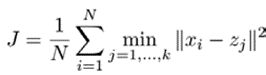

In [ ]:
#INTERNAL VALIDATION I:

import numpy.linalg as LA

def checkQuality_internal( indata, cents ):
  mindistsum = 0
  
  for thispoint in indata:

    # calculate thisdistances from one datapoint to all centroids
    tempdist = []
    for cent in cents:
      tempdist.append (  LA.norm( thispoint-cent ) **2   )
    
    # pick mindist from tempdist
    mindist = min(tempdist)

    # sum mindist into mindistsum
    mindistsum += mindist

  # ans
  return mindistsum / n

In [ ]:
print(checkQuality_internal(lines, centroids_advanced))

2545263.9694




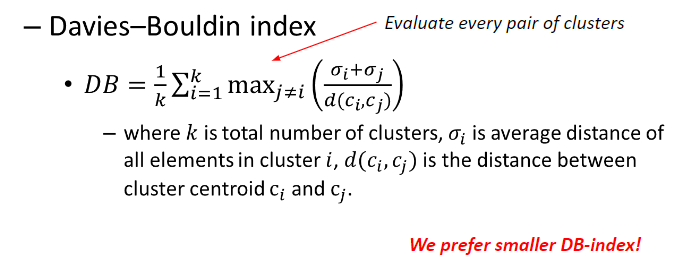

In [ ]:
# INTERNAL VALIDATION II: db index

def compute_average_intra_cluster_distances( cent, clustaff, k ):

  avg_distances = np.zeros ((k))

  # a. first, count how many points are in each cluster
  clusterpoint_counts = np.zeros(k)
  for aff in clustaff:
    point_affiliation = aff[1]
    clusterpoint_counts[point_affiliation] += 1

  # b. then, perform n sum operations 
  for i, aff in enumerate(clustaff):
    # print('checking point number', i)
    # aff = [thispoint_coordinates, c]
    thispoint_coordinates = aff[0]
    c = aff[1]
    thispoint_distance_to_centroid = distance.euclidean ( thispoint_coordinates, cent[c] )

    # print(i, 'this points distance to affiliated centroid number:', c,'. Distance:' ,thispoint_distance_to_centroid)

    # add this distance to entry number c in average_intra_cluster_distances
    avg_distances[c] = avg_distances[c] + thispoint_distance_to_centroid
    # print(avg_distances[c])

  # c. then, perform k divide operations
  for i, thiscount in enumerate(clusterpoint_counts):
    avg_distances[i] = np.divide ( avg_distances[i] , thiscount )

  return avg_distances

def db_index ( cent, clustaff, k):

  # 1. initialize and populate average intra cluster distances array
  
  average_intra_cluster_distances = compute_average_intra_cluster_distances (cent, clustaff, k)
  print('initialized and populated average intra_cluster distances:', np.shape(average_intra_cluster_distances))

  # 2. initialize and populate inter_centroid_distances array

  inter_centroid_distances = np.zeros ((k,k))
  for i in range (k):
    for j in range(k):
      inter_centroid_distances[i][j] = distance.euclidean ( cent [i], cent[j] )
  print('initialized inter_centroid_distances:', np.shape(inter_centroid_distances))

  presum_array = []
  for i in range(k):
    a_matrix = []
    for j in range(k):
      if i == j:
        continue
      #else, calculate a for (i,j)
      a = average_intra_cluster_distances[i] - average_intra_cluster_distances[j]
      a = a / inter_centroid_distances[i][j]
      a_matrix.append(a)
    
    # for current i, append max value of a into presum_array
    presum_array.append ( max(a_matrix) )

  ans = np.sum(presum_array)
  ans = ans/k
  return ans

print(db_index( centroids_advanced, cluster_affiliations, k ) )

initialized and populated average intra_cluster distances: (10,)
initialized inter_centroid_distances: (10, 10)
0.272559944180931


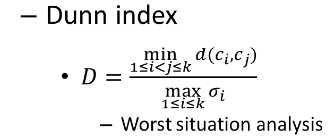

In [ ]:
# INTERNAL VALIDATION II: Dunn index

def dunn_index ( intra_cluster, k, cent ):

  # set up inter-centroid distances array

  inter_centroid_distances = np.zeros ((k,k))
  for i in range (k):
    for j in range(k):
      inter_centroid_distances[i][j] = distance.euclidean ( cent [i], cent[j] )
  print('initialized inter_centroid_distances:', np.shape(inter_centroid_distances))

  inter_i = []
  intra_i = []

  for i in range (k):
    
    # store cluster i's intra clust dist
    intra_i.append( intra_cluster[i] )

    # list i's distances to every neighbor j
    inter_j = []
    for j in range(k):
      inter_j.append(inter_centroid_distances[i][j])

    # compute i's distance to closest neighbor
    min_inter_j= min (inter_j)

    # remember i's worst inter-cluster distance
    inter_i.append ( min_inter_j )

  #compute max intra clust dist (worst case)
  intra_max = max( intra_i )

  #compute min inter clust dist (worst case)
  inter_min = max( inter_i )

  return inter_min / intra_max 

average_intra_cluster_distances = compute_average_intra_cluster_distances (centroids_advanced, cluster_affiliations, k)
print( dunn_index ( average_intra_cluster_distances, k, centroids_advanced ) )

initialized inter_centroid_distances: (10, 10)
0.0


In [ ]:
w_given = [ [] for _ in range(k) ]
for i, label in enumerate (lines_labels):
  target_cluster = int(label[0])
  w_given[ target_cluster ].append( i )

w_computed = [ [] for _ in range(k) ]
for i, affiliation in enumerate (cluster_affiliations):
  w_computed[affiliation[1]].append(int(i))

for w in w_given:
  print(w)
print('\n')

for w in w_computed:
  print(w)
  


[6, 52, 57, 73, 75, 81, 93, 107, 109, 112, 126, 152, 164, 167, 181, 182, 202, 211, 223, 227, 233, 241, 248, 271, 272, 303, 310, 314, 336, 348, 353, 357, 358, 363, 369, 373, 379, 385, 386, 390, 395, 396, 404, 417, 455, 470, 493, 501, 502, 508, 522, 545, 550, 551, 555, 567, 578, 590, 607, 609, 622, 628, 648, 651, 675, 682, 688, 703, 727, 730, 756, 768, 779, 788, 806, 810, 814, 824, 825, 844, 845, 851, 910, 934, 966, 1003, 1005, 1007, 1021, 1022, 1029, 1040, 1042, 1045, 1046, 1070, 1073, 1083, 1090, 1094, 1104, 1108, 1111, 1118, 1137, 1147, 1148, 1166, 1169, 1179, 1180, 1199, 1202, 1203, 1206, 1218, 1242, 1243, 1255, 1276, 1291, 1299, 1321, 1358, 1361, 1362, 1376, 1388, 1420, 1427, 1428, 1429, 1480, 1492, 1499, 1501, 1507, 1519, 1537, 1541, 1551, 1566, 1571, 1577, 1580, 1582, 1588, 1598, 1614, 1622, 1652, 1659, 1694, 1725, 1741, 1744, 1754, 1772, 1779, 1782, 1787, 1788, 1814, 1823, 1836, 1867, 1882, 1902, 1911, 1917, 1930, 1943, 1967, 1983, 1986, 1990, 1997, 2003, 2006, 2018, 2037, 2092, 

In [ ]:
def count_hits ( this_set, that_set ):
  hit_count = 0
  for index in this_set:
    if index in that_set:
      hit_count += 1
  return hit_count

def purity_index ( N, W_given, W_computed ):

  max_hitcounts = []

  for i in range (k):
    # target computed members of ith cluster
    computed_i = W_computed[i]

    # start storing the number of hits for cluster i
    hitcounters_i = []

    for j in range(k):
      # target actual members of jth cluster
      given_j = W_given[j]

      # count the number of common items between 
      # computed_i matches with given_i
      hitcount_j = count_hits (computed_i, given_j)
      hitcounters_i.append(hitcount_j)
    
    max_hitcounts.append ( max(hitcounters_i) )

  print('max hitcounts:', max_hitcounts )

  # compute result
  max_hitcounts_sum = sum (max_hitcounts)
  ans = max_hitcounts_sum / N

  return ans

print(purity_index ( n, w_given, w_computed) )

max hitcounts: [1549, 730, 855, 1021, 1411, 1201, 1272, 1014, 1030, 1552]
0.58175


In [ ]:
def rand_index ():

  #indexes_1 = [list of every index in the dataset]
  indexes_1 = np.arange(n)

  #indexes_2 = [ also another duplicate list of every index in the dataset]
  indexes_2 = np.arange(n)

  tuple_combinations = unordered_combination( indexes_1, indexes_2 )

  confusion_matrix = np.zeros ( (2,2) ) 
  for tuple_combination in tuple_combinations:
    i = tuple_combination[0]
    j = tuple_combination[1]

    c_i = cluster_affiliations[i][1]
    c_j = cluster_affiliations[j][1]

    w_i = int(lines_labels[i][0])
    w_j = int(lines_labels[j][0])

    if c_i == c_j:
      if w_i == w_j:
        #TP
        confusion_matrix[0][0] += 1
      elif w_i != w_j:
        #FP
        confusion_matrix[0][1] += 1
    
    elif c_i != c_j:
      if w_i == w_j:
        #FN
        confusion_matrix[0][0] += 1
      elif w_i != w_j:
        #TN
        confusion_matrix[0][1] += 1

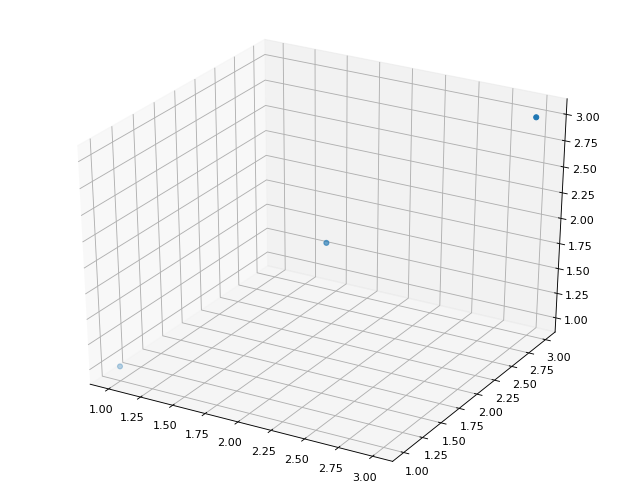

In [ ]:
# Template: 3D plotting using matplotllib

#plot a 2D line on the ground
x = np.array(
    [[1,1,1], 
     [2,2,2],
     [3,3,3]
     ])

figure(figsize=(10, 8), dpi=80)
axes=plt.axes(projection="3d")
axes.scatter( x[0:,0] , x[0:,1], x[0:,2] )

# ready. Now apply this to 3D array representation of 784-dimensional images

In [ ]:
# prepare tsne sample
tsample = []
for _ in range(1000):
  random_index = random.randint(0, 20000 - 1)
  tsample.append(lines[random_index])

tsample = np.array(tsample)
print(np.shape(tsample))

(1000, 784)


In [ ]:
# so which sample datapoint belongs to which centroid_advanced? We'll need that for color-coding the sample 3d plot.

# these 1000 datapoints will be affiliated for the first time. Therefore...
first_time = True
# Doesn't matter what cluster_affiliation's value is. Since first_time = True, Clustaff will be initialized from scratch anyway. 

test_affiliations, digit_detection_count, flag, first_time, counter = reaffiliate_everyone( tsample , cluster_affiliations, centroids_advanced, k, first_time )

reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[30, 21, 9, 234, 56, 155, 149, 173, 42, 131]
number of points reaffiliated: 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# now, compute the coordinates of the 10 big balls.

test_centroids = recompute_centroids ( tsample, test_affiliations, digit_detection_count, k )

recomputing centroids...
(10, 784)
done


In [ ]:
# Revelation Time.

show_images( test_centroids, False )

In [ ]:
# Q7 preprocessing done. Time to wrap it up.

#apply tsne on tsne sample data
from sklearn.manifold import TSNE

tsne_sample = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(tsample)

In [ ]:
# do the same for the test_centroids

test_centroids_tsne = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(test_centroids)

In [ ]:
def rainbow_cloud( indata, clustaff, cents):
  plt.figure(figsize=(12, 10), dpi=100)
  axes=plt.axes(projection="3d")

  colors = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'deeppink', 'mediumseagreen', 'deepskyblue', 'springgreen']

  #plotting each cluster member as uniquely colored points
  for j, point in enumerate (indata):
    #which cluster does this point belong to?
    aff = clustaff[j][1]
    axes.scatter( point[0] , point[1], point[2] , color = colors[aff], s=15)

  #plotting each centroids as bigger and unqiuely colored points

  for i,cent in enumerate (cents):
    axes.scatter ( cent[0], cent[1], cent[2], s = 350+(2*i), color = colors[i] ) 

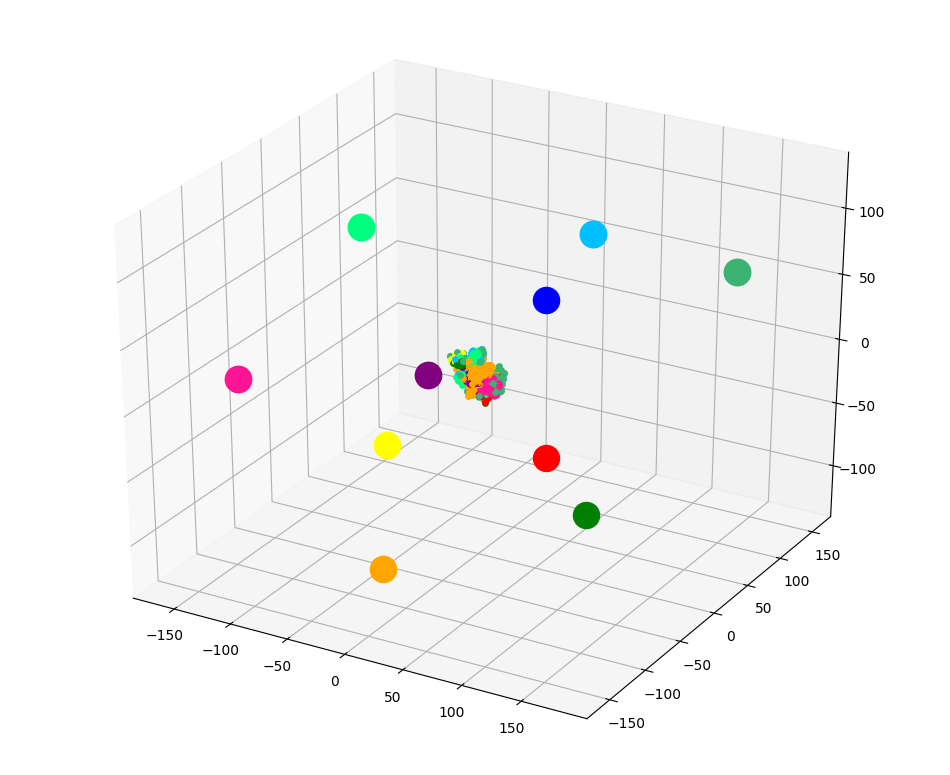

In [ ]:
# Visualize test data with respect to detection results

rainbow_cloud ( tsne_sample, test_affiliations, test_centroids_tsne )

In [ ]:
# now, let's project into eigen_basis.

np.shape(lines)

(20000, 784)

In [ ]:
def demean_dataset ( inset_flattened ):
    # find mean of flattened trainset
    #1. Transpose so that each row becomes an attribute
    inset_flattened_transposed = inset_flattened.T
    print('transposed the flattened training dataset:', np.shape(inset_flattened_transposed), type(inset_flattened_transposed))
    
    #2. Find mean of each row (attribute), save it as the mean image vector
    print('computing mean vector...')
    miu = np.array( [np.mean(attribute) for attribute in inset_flattened_transposed ] )
    print('done', np.shape(miu), '\n')    
    
    print('vstacking mean vector...')
    N = np.shape(inset_flattened)[0]
    miu_instacked = np.vstack([miu]*N)
    print('done', np.shape(miu_instacked), '\n')    
    
    # demean every image in training dataset
    print('demeaning dataset...')
    inset_demeaned = inset_flattened - miu_instacked
    print('dataset demeaned successfully:', np.shape(inset_demeaned))
    
    return inset_demeaned

In [ ]:
lines_demeaned = demean_dataset (lines)

transposed the flattened training dataset: (784, 20000) <class 'numpy.ndarray'>
computing mean vector...
done (784,) 

vstacking mean vector...
done (20000, 784) 

demeaning dataset...
dataset demeaned successfully: (20000, 784)


In [ ]:
def pca(inset,N,K):
  inset_flattened_demeaned_sample =  inset[:N]
  np.shape(inset_flattened_demeaned_sample)
  
  A = inset_flattened_demeaned_sample.T
  np.shape(A)

  print('calculating covfefe...')
  covmat = np.dot(A.T,A)

  print('done:', np.shape(covmat))

  
  print('computing eigenvalues and eigenvectors...')
  eigenvalues, eigenvectors = LA.eigh(covmat)

  print(eigenvalues)
  np.shape(eigenvalues)
  print(eigenvectors)
  np.shape(eigenvectors)

  # compute list of K largest eigenvalues
  max_12_values = Nmaxelements (list(eigenvalues), K)
  np.shape(max_12_values)

  # compute their positions in the eigenvalues list
  max_12_indexes = []
  for max_value in max_12_values:
      max_eigen_index = list(eigenvalues).index(max_value)
      max_12_indexes.append( max_eigen_index )
  max_12_indexes

  # get list of 12 largest eigenvalues
  max_12_eigenvectors = []

  for max_index in max_12_indexes:
      max_12_eigenvectors.append(eigenvectors[max_index])
  max_12_eigenvectors = np.array (max_12_eigenvectors)
  np.shape(max_12_eigenvectors)

  U = max_12_eigenvectors.T
  np.shape(U)

  print(np.shape(U))
  print(np.shape(A))

  # multiply U and A in compatible order

  eigenfaces = np.matmul ( U.T, A.T )

  np.shape(eigenfaces)
  # same as U.T from slide 36

  # bring ONE training face down into the eigen dimension 
  print(np.shape(A))

  # multiply eignfaces and A
  inset_projected = np.matmul ( eigenfaces, A )
  print(np.shape(inset_projected))
  
  return inset_projected,eigenfaces

def Nmaxelements(list1, N):
    final_list = []
  
    for i in range(0, N): 
        max1 = 0
          
        for j in range(len(list1)):     
            if list1[j] > max1:
                max1 = list1[j];
                  
        list1.remove(max1);
        final_list.append(max1)
          
#     print('final_list:', final_list)
    return final_list

In [ ]:
print(np.shape(lines_demeaned))
lines_projected, lines_eigenfaces = pca(lines_demeaned, 6000, 12)

(20000, 784)
calculating covfefe...
done: (6000, 6000)
computing eigenvalues and eigenvectors...
[-9.21802711e-07 -7.50113130e-07 -6.82697282e-07 ...  1.30894868e+09
  1.45339563e+09  1.99035674e+09]
[[ 0.          0.          0.         ... -0.00198358  0.00074014
   0.00674876]
 [-0.12843092 -0.15617361 -0.2143465  ...  0.0240284  -0.00430112
   0.00905029]
 [ 0.28627566  0.38760623 -0.01112955 ... -0.00593109  0.01995576
   0.01117538]
 ...
 [-0.01985403 -0.00788646  0.00767749 ...  0.01649704 -0.01184058
  -0.00774933]
 [-0.00794296  0.01552846  0.01906302 ...  0.00381509 -0.02204601
  -0.00851894]
 [ 0.01064105  0.01107972 -0.00654111 ...  0.00782879  0.01403958
  -0.01120317]]
(6000, 12)
(784, 6000)
(784, 6000)
(12, 6000)


In [ ]:
lines_projected_transposed = lines_projected.T
np.shape(lines_projected_transposed)

(6000, 12)

In [ ]:
# run kmeans on projected points

def initialize_centroids(data, dimension, k):
    centroids = np.zeros ((k,dimension))
    # centroids = [[0 for _ in range(dimension)] for _ in range(k)]
    max_feature_vals = [0 for _ in range(dimension)]
    min_feature_vals = [float('inf') for _ in range(dimension)]
    for point in data:
        for i in range(dimension):
            max_feature_vals[i] = max(max_feature_vals[i], point[i ])
            min_feature_vals[i] = min(min_feature_vals[i], point[i ])
    for i in range(dimension):
        min_feature_val = min_feature_vals[i]
        max_feature_val = max_feature_vals[i]
        diff = max_feature_val - min_feature_val
        for j in range(k):
            centroids[j][i] = min_feature_val + diff * random.uniform(1e-5, 1)
    print(type(centroids))
    return centroids, True

def reaffiliate_everyone( indata, clustaff, cents, k, first_run ):
  print('reaffiliating everyone...')

  n,d = np.shape (indata)

  if first_run == True:  
    # ignore clustaff input and init clustaff from scratch
    clustaff = np.array([[indata[i], None] for i in range(n)])
    print('running reaffiliation program for the first time. Initializing clustaff from scratch...')
  # else:
    # use the clustaff tht was passed into this function

  # after each reaffiliation, we'll also keep count of points per cluster
  cpcount = [0 for _ in range(k)]

  # stores whether at least one point was reaffliated. So, before reaffiliation, this value will be zero.
  flag = 0

  # counts the number of points that were reaffiliated. So, before reaffiliation, this value will also be zero.
  reaff_count = 0

  print('flag before mass reaffiliation: ', flag)
  for thispoint_index in range (len(indata)):
    # print(thispoint_index)
    thispoint = indata[thispoint_index]
    distances = []

    # find distances from thispoint to all centroids
    for cent in cents:
      distances.append ( distance.euclidean(thispoint, cent) )

    # find the smallest distance, and corresponding cluster number. 
    closest_distance = np.amin(distances)
    min_dist_index = distances.index (closest_distance)
    # print('thispoints closest centroid is centroid number ', min_dist_index)

    # thispoint will be affiliated with cluster number min_dist_index; 
    # but only if min_dist_index is different from thispoint's existing cluster number.
    if clustaff[thispoint_index][1] != min_dist_index:
      flag = 1
      reaff_count += 1
      clustaff[thispoint_index][1] = min_dist_index
      
    # else:
      # don't bother reaffiliating this point. Flag remains == 0.
      # print('this point will NOT be reaffiliated.')


    # once reaffilliation is done, count this point.
    cpcount[clustaff[thispoint_index][1]] += 1
    reaff_count += 1
  print('flag after mass reaffiliation: ', flag, 'which means...')

  if flag == 1:
    print('At least one point was reaffiliated.')
  elif flag == 0:
    print('No points were reaffiliated. Kmeans has finally converged.')
  
  print(cpcount)
  print('number of points reaffiliated:', reaff_count )

      
  return clustaff, cpcount, flag, False, reaff_count

def recompute_centroids( indata, clustaff, cpcount, k ):
  global cent
  print('recomputing centroids...')
  n,d = np.shape(indata)

  cent =  np.array([[0 for _ in range(d)] for _ in range(k)] )
  print(np.shape(cent))

  # print('before add:', cent)
  for i, aff in enumerate( clustaff ):
    # find out which cluster this point belongs to. Call it c.
    c = aff[1]
    # print('point number', i , 'belongs to cluster number', c)

    # add this point's coordinates to the cth centroid
    cent[c] = np.add ( cent[c], aff[0] ) 
    # print(cent[c])

  for i in range(k):
    # divide each centroid's coordinates 
    # with the number of points that belong to that centroid
    if cpcount[i] ==0:
      continue
    cent[i] = np.divide( cent[i], cpcount[i])
    
  # print('after recomputing:')
  # for centroid in cent:
  #   print(centroid)
  # print('done\n')
  print('done')

  return cent

def kmeans( data, d, k):
    centroids_advanced, first_time  = initialize_centroids (data, d, k)
    print('centroids initialized', np.shape(centroids_advanced), '(index column included)')
    print('first_time:', first_time )
    # print(centroids_advanced)

    cluster_affiliations = []
    cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( data , cluster_affiliations, centroids_advanced, k, first_time )

    #if prints nothing, then ok.
    for affiliation in cluster_affiliations:
      if affiliation[1] == None:
        print(affiliation[1])

    centroids_advanced = recompute_centroids ( data, cluster_affiliations, cluster_point_count, k )
    print(flag)
    print(first_time)

    while flag:
        cluster_affiliations, cluster_point_count, flag, first_time, counter = reaffiliate_everyone( data , cluster_affiliations, centroids_advanced, k, first_time )
        centroids_advanced = recompute_centroids ( data, cluster_affiliations, cluster_point_count, k )
        print('flag:', flag)
        
    return centroids_advanced, cluster_affiliations, cluster_point_count

In [ ]:
n,d  = np.shape(lines)
print(n, d)

20000 784


In [ ]:
# comparing between higher and lower dimensions
start = time.time ()
print('performing kmeans on reduced dimension data...')
centroids_regular, cluster_affiliations_regular, cluster_point_count_regular = kmeans (lines, 784, 10 )
end = time.time()

performing kmeans on reduced dimension data...
<class 'numpy.ndarray'>
centroids initialized (10, 784) (index column included)
first_time: True
reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[0, 3335, 4530, 9974, 45, 546, 159, 497, 878, 36]
number of points reaffiliated: 40000
recomputing centroids...
(10, 784)
done
1
False
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[163, 4662, 3314, 6011, 613, 983, 1067, 1385, 1412, 390]
number of points reaffiliated: 29328
recomputing centroids...
(10, 784)
done
flag: 1
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[971, 4572, 3033, 4069, 991, 1058, 1398, 1439, 1829, 640]
number of points reaffiliated: 24074
recomputing centroids...
(10, 784)
done
flag: 1
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[1421, 4415, 2766, 3158, 1227, 1056, 1531, 1472, 2129

In [ ]:
print('Time taken to cluster 20k points:', end-start, 'seconds')

Time taken to cluster 20k points: 151.0069456100464 seconds


In [ ]:
print(np.shape( lines_projected_transposed ))
print(np.shape( lines_demeaned ))

(6000, 12)
(20000, 784)


In [ ]:
start_reduced = time.time ()
print('performing clustering on 12-dimensional data...')
centroids_reduced, cluster_affiliations_reduced, cluster_point_count_reduced = kmeans (lines_projected_transposed, 12, 10 )
end_reduced = time.time()

performing clustering on 12-dimensional data...
<class 'numpy.ndarray'>
centroids initialized (10, 12) (index column included)
first_time: True
reaffiliating everyone...
running reaffiliation program for the first time. Initializing clustaff from scratch...
flag before mass reaffiliation:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[9, 72, 80, 642, 0, 1595, 3066, 0, 11, 525]
number of points reaffiliated: 12000
recomputing centroids...
(10, 12)
done
1
False
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[154, 473, 278, 609, 711, 1004, 2011, 0, 214, 546]
number of points reaffiliated: 8458
recomputing centroids...
(10, 12)
done
flag: 1
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[229, 727, 344, 513, 606, 843, 1632, 363, 280, 463]
number of points reaffiliated: 7329
recomputing centroids...
(10, 12)
done
flag: 1
reaffiliating everyone...
flag before mass reaffiliation:  0
flag after mass reaffiliation:  1 which means...
At least one point was reaffiliated.
[253, 743, 414, 441, 642, 732, 1488, 518, 310, 459]
number of points reaffil

In [ ]:
print('time taken:', end_reduced-start_reduced, ' seconds')

time taken: 20.808629989624023  seconds


In [ ]:
print(np.shape(centroids_reduced))
print(np.shape(centroids_regular))

(10, 12)
(10, 784)


In [ ]:
print(np.shape(lines_eigenfaces))

(12, 784)


In [ ]:
#bring back into 784 dimensions
lines_unprojected = np.matmul ( lines_eigenfaces.T, centroids_reduced.T ).T
np.shape(lines_unprojected)

(10, 784)

In [ ]:
show_images (lines_unprojected, False)

In [ ]:
np.shape(lines_demeaned)

NameError: ignored

In [ ]:
# project data points in 3 dimension 
lines_3d, lines_3d_eigenfaces = pca (lines_demeaned, 6000, 3)

# project centroids into 3 dimension
centroids_3d, centroids_3d_eigenfaces = pca(centroids_regular, 10, 3)

calculating covfefe...
done: (6000, 6000)
computing eigenvalues and eigenvectors...
[-9.21802711e-07 -7.50113130e-07 -6.82697282e-07 ...  1.30894868e+09
  1.45339563e+09  1.99035674e+09]
[[ 0.          0.          0.         ... -0.00198358  0.00074014
   0.00674876]
 [-0.12843092 -0.15617361 -0.2143465  ...  0.0240284  -0.00430112
   0.00905029]
 [ 0.28627566  0.38760623 -0.01112955 ... -0.00593109  0.01995576
   0.01117538]
 ...
 [-0.01985403 -0.00788646  0.00767749 ...  0.01649704 -0.01184058
  -0.00774933]
 [-0.00794296  0.01552846  0.01906302 ...  0.00381509 -0.02204601
  -0.00851894]
 [ 0.01064105  0.01107972 -0.00654111 ...  0.00782879  0.01403958
  -0.01120317]]
(6000, 3)
(784, 6000)
(784, 6000)
(3, 6000)
calculating covfefe...
done: (10, 10)
computing eigenvalues and eigenvectors...
[  286297.98913285   362996.85875276   409726.9147387    508749.29757688
   733028.98142224  1023850.53360389  1360385.86605393  1454677.72484181
  2428356.98071336 23605493.85316356]
[[ 0.16516465

In [ ]:
# project clustaffs into 3 dimension
clustaff_3d, centroids_3d_eigenfaces = pca(centroids_regular, 10, 3)

In [ ]:
# transpose projected points and centroids into comfortable shape

lines_3d = lines_3d.T 
print(np.shape(lines_3d))

centroids_3d = lines_3d.T 
print(np.shape(centroids_3d))

(6000, 3)
(3, 6000)


In [ ]:
# do the same for cluster_affiliation

print(cluster_affiliations_reduced[0][0][:3])
print(cluster_affiliations_reduced[0][1])

5

In [ ]:
# "So you'll have to use the first 3 coordinates from the 12 coordinates you get from task1"
clustaff_3d = np.array([[None, None] for i in range(6000)])
# cluster_affiliations_3d = 

# from each row of cluster_affiliations_reduced,
# take the first three coordinates and store into caff[0]
# take the affiliation and store into caff[1]

for i, caff in enumerate(clustaff_3d):
  caff[0] = cluster_affiliations_reduced[i][0][:3]
  caff[1] = cluster_affiliations_reduced[i][1]

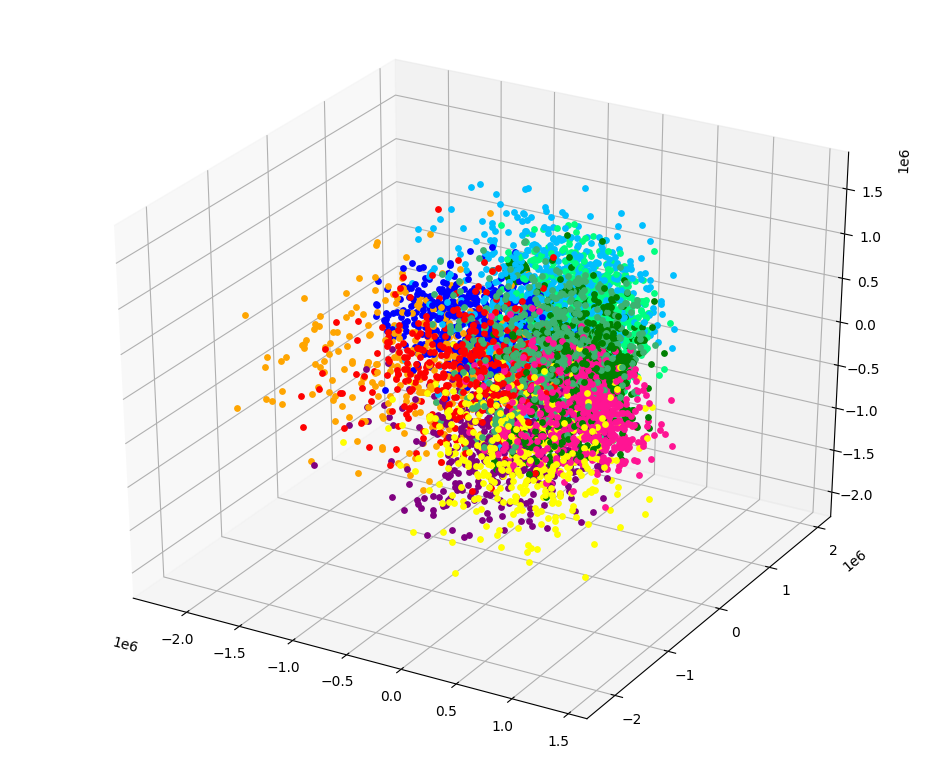

In [ ]:
clustaff_3d

# now, we can use rainbow_cloud on lines_3d and centroids_3d
# print((cluster_affiliations_reduced[0]))

rainbow_cloud( lines_3d, clustaff_3d, centroids_3d)